In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from scipy import signal
import time
from PIL import Image  # Ajout de l'import pour Pillow

### Cette fonction retourne un tableau de nombres complexes correspondant à un filtre de Gabor défini selon plusieurs paramètres : ###

In [6]:
def gabor_kernel(lambd = 16.0, theta = 0.0, n = 0, sl = 0.7, st = 1.4, nl = 4.0):
	if n <= 0: n = 1+2*int(nl*lambd)
	gl = -0.5/(sl*sl)
	gt = -0.5/(st*st)
	c = math.cos(theta)/lambd
	s = math.sin(theta)/lambd
	x0 = 0.5*(n-1)*(c+s)
	y0 = 0.5*(n-1)*(c-s)
	sc = 1.0/(2*math.pi*sl*st*lambd*lambd)
	gk = np.empty( (n,n), dtype='complex64' )
	for y in range (0,n):
		for x in range (0,n):
			xr = c*x+s*y-x0  # centering, rotation and scaling
			yr = c*y-s*x-y0  # centering, rotation and scaling
			a = 2.0*math.pi*xr  # wave phase
			gk[y,x] = sc*math.exp(gl*xr*xr+gt*yr*yr)*complex(math.cos(a),math.sin(a))
	return gk

### Variante : onde seule (sans gaussienne) ###

In [7]:
# 这个函数目的是生成一个表示波纹模式的复数数组
# lambd 波长，默认为 16.0
# theta 波的方向，以弧度表示，默认为 0.0
# sl 水平方向上的标准差，默认为 0.7
# st 垂直方向上的标准差，默认为 1.4
# nl 常数
def wave_kernel(lambd = 16.0, theta = 0.0, n = 0, sl = 0.7, st = 1.4, nl = 4.0):
	if n <= 0: n = 1+2*int(nl*lambd)
	gl = -0.5/(sl*sl) # 计算水平方向上的高斯滤波器参数
	gt = -0.5/(st*st) # 计算垂直方向上的高斯滤波器参数
	c = math.cos(theta)/lambd # 计算cosine分量，用于后续的旋转和缩放
	s = math.sin(theta)/lambd # 计算sine分量，用于后续的旋转和缩放
	x0 = 0.5*(n-1)*(c+s) # 计算平移中心，以便将波纹居中
	y0 = 0.5*(n-1)*(c-s)
	sc = 1.0/(2*math.pi*sl*st*lambd*lambd) # 计算缩放系数，用于控制波纹的振幅
	gk = np.empty( (n,n), dtype='complex64' ) # 创建一个空的复数数组，用于存储波纹模式
	for y in range (0,n): 
		for x in range (0,n):
			xr = c*x+s*y-x0  # centering, rotation and scaling
			yr = c*y-s*x-y0  # centering, rotation and scaling
			a = 2.0*math.pi*xr  # wave phase
			gk[y,x] = sc*complex(math.cos(a),math.sin(a)) # 循环遍历数组的每个元素，根据波的位置和相位，计算复数值，并存储在数组中
	return gk # 返回生成的波纹数组

### Variante : gaussienne seule (sans onde) ###

In [8]:
def gaussian_kernel(lambd = 16.0, theta = 0.0, n = 0, sl = 0.7, st = 1.4, nl = 4.0):
	if n <= 0: n = 1+2*int(nl*lambd)
	gl = -0.5/(sl*sl)
	gt = -0.5/(st*st)
	c = math.cos(theta)/lambd
	s = math.sin(theta)/lambd
	x0 = 0.5*(n-1)*(c+s)
	y0 = 0.5*(n-1)*(c-s)
	sc = 1.0/(2*math.pi*sl*st*lambd*lambd)
	gk = np.empty( (n,n), dtype='complex64' )
	for y in range (0,n):
		for x in range (0,n):
			xr = c*x+s*y-x0  # centering, rotation and scaling
			yr = c*y-s*x-y0  # centering, rotation and scaling
			a = 2.0*math.pi*xr  # wave phase
			gk[y,x] = sc*math.exp(gl*xr*xr+gt*yr*yr)
	return gk

### Affichage d'un noyau complexe ### 

In [9]:
# 这个函数的目的是将给定的复数数组分解为实部和虚部，并通过图像展示它们，同时保存实部和虚部的图像为灰度图像文件
def kernel_plot(k):
	kr = (k.view(np.float32).reshape(k.shape + (2,)))[:,:,0]  # extract real (cos) part 提取实部
	ki = (k.view(np.float32).reshape(k.shape + (2,)))[:,:,1]  # extract imaginary (sin) part 提取虚部
	mpimg.imsave('kr.jpg',kr,cmap="gray")
	mpimg.imsave('ki.jpg',ki,cmap="gray") # 将提取的实部和虚部保存为灰度图像，分别命名为 'kr.jpg' 和 'ki.jpg'
	fig, (re, im) = plt.subplots(1, 2)  # real and imaginary parts 创建一个包含两个子图（real和imaginary）的图形对象
	re.imshow(kr, cmap='gray') # 显示实部的图像
	re.set_title('Real part') 
	re.set_axis_off() # 取消子图的坐标轴
	im.imshow(ki, cmap='gray') # 显示虚部的图像
	im.set_title('Imaginary part')
	im.set_axis_off() # 取消子图的坐标轴


## 1. Visualiser plusieurs variantes de filtre et comprendre l'effet des paramètres. ##

### Onde plane avec longueur d'onde de 24 pixels et orientation de pi/3 (60 degrés, l'origine est en haut à gauche) ###

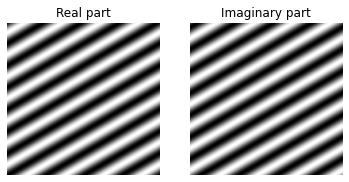

In [7]:
gk = wave_kernel(lambd=24, theta = math.pi/3)
kernel_plot(gk)

### Gaussienne elliptique (par défaut avec sl = 0.7 et st = 1.4) 椭圆高斯 ###

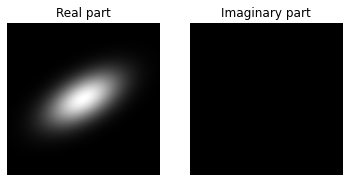

In [8]:
# 这段代码生成一个高斯波纹模式，并通过 kernel_plot 函数展示了该模式的实部和虚部。这可以帮助理解生成的波纹在空间中的分布和方向。
gk = gaussian_kernel(lambd=24, theta = math.pi/3)
kernel_plot(gk)

### Filtre de Gabor (produit des deux) ###

(1921, 1921)

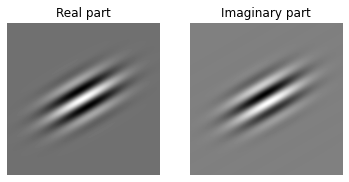

In [9]:
gk = gabor_kernel(lambd=240, theta = math.pi/3)
kernel_plot(gk)
gk.shape # 数组的维度大小

### Longueur d'onde de 12 pixels ###

(97, 97)

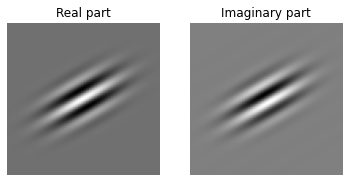

In [10]:
gk = gabor_kernel(lambd=12, theta = math.pi/3)
kernel_plot(gk)
gk.shape

### Les mêmes avec une taille de fenêtre fixe et à la même échelle : ###

(256, 256)

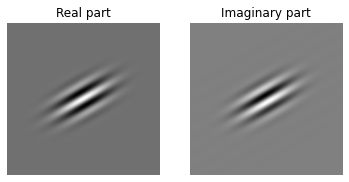

In [11]:
gk = gabor_kernel(lambd=24, theta = math.pi/3, n = 256)
kernel_plot(gk)
gk.shape

(256, 256)

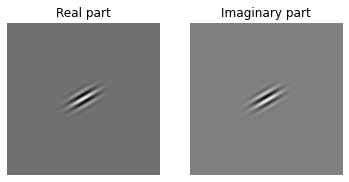

In [12]:
gk = gabor_kernel(lambd=12, theta = math.pi/3, n = 256)
kernel_plot(gk)
gk.shape

### Filtre circulaire : st = sl = 1 ###

(193, 193)

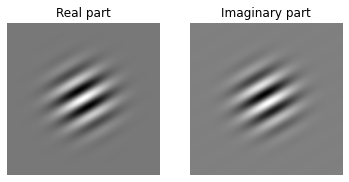

In [13]:
# sl 水平方向上的标准差
# st 垂直方向上的标准差
gk = gabor_kernel(lambd=24, theta = math.pi/3, sl = 1.0, st = 1.0)
kernel_plot(gk)
gk.shape

### Filtre avec “effet de bord” (dans le filtre) : 带有 "边缘效应 "的滤镜（在滤镜中） ###

(121, 121)

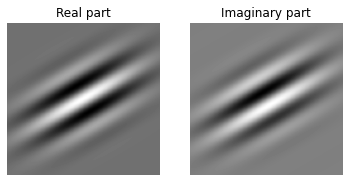

In [14]:
gk = gabor_kernel(lambd=24, theta = math.pi/3, nl = 2.5)
kernel_plot(gk)
gk.shape

## 2. Application d'un filtre à une image ##

### Lecture d'une image : ###

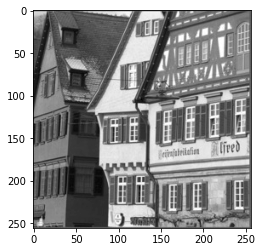

In [15]:
img = mpimg.imread('images2/houses.jpeg')
plt.imshow(img, cmap="gray")

### Utilisation de la fonction convolve2d de scipy.signal et affichage du module de l'image transformée : ###

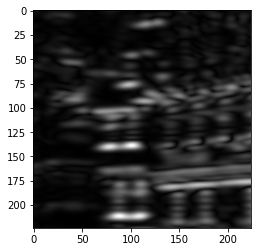

In [16]:
gk = gabor_kernel(lambd=4, theta = math.pi/2)
gab = signal.convolve2d(img, gk, boundary='symm', mode='valid')
plt.imshow(np.absolute(gab), cmap="gray")

Voir l'effet des changements d'orientation et d'échelle sur les images transformée.

## 3. Calcul de l'énergie moyenne à travers un filtre d'orientation et d'échelle donnés ##

Utiliser les fonctions numpy qui vont bien :

- np.absolute() pour calculer le module d'un nombre complexe (élément par élément dans un tableau)
- np.square() pour calculer le carré d'un nombre (élément par élément dans un tableau)
- np.average() pour calculer la moyenne des valeurs dans un tableau

In [24]:
def compute_energy(image, orientations, scales):
    gt = np.zeros((len(scales), orientations))
    
    for index, scale in enumerate(scales):
        for orientation in range(orientations):
            theta = orientation * math.pi / 8
            gk = gabor_kernel(lambd=scale, theta=theta)
            gab = signal.convolve2d(image, gk, boundary='symm', mode='valid')
            energy = np.average(np.square(np.absolute(gab))) / 2**index
            gt[index, orientation] = energy
            
    return gt

## 4. Calcul d'une transformée de Gabor ##

On considère 8 orientations (multiples de pi/8, partant de 0) et 4 longeurs d'ondes selon une échelle logarithmique partant de 3 et avec un facteur 2 (i.e.: 3, 6, 12 et 24 pixels). Il faut produire un tableau gt de 4 lignes par 8 colonnes dont les valeurs sont les énergies moyennes pour les orientations et les échelles correspondantes.

19.909153
4.417941
1.1953427
3.0932374
10.112253
1.2978446
0.9887684
1.8668715
45.795364
7.115793
2.87581
7.373159
19.314754
2.469417
2.7780645
4.7914166
36.11757
20.082066
5.014501
4.1616993
36.05375
4.686443
2.6581678
5.5206823
108.8322
35.299866
4.14917
12.267246
48.932583
5.9420743
1.325686
18.153698


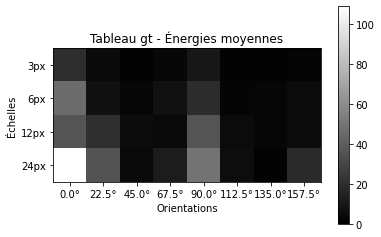

In [30]:
# orientations = [0, 1, 2, 3, 4, 5, 6, 7]
# scales = [3, 6, 12, 24]

# img = mpimg.imread('images2/houses.jpeg')
# gt = np.zeros((len(scales), len(orientations)))

# for index, scale in enumerate(scales):
#     for ori in orientations:
#         gk = gabor_kernel(lambd=scale, theta = ori * math.pi/8)
#         gab = signal.convolve2d(img, gk, boundary='symm', mode='valid')
#         energy = np.average(np.square(np.absolute(gab)))
#         gt[index, ori ] = energy
#         print(energy)
        
# plt.imshow(gt,cmap='gray',vmin=0,vmax=np.amax(gt))
# plt.title('Tableau gt - Énergies moyennes')
# plt.xlabel('Orientations')
# plt.ylabel('Échelles')
# plt.xticks(np.arange(len(orientations)), labels=[f'{ori * 180/8}' for ori in orientations])
# plt.yticks(np.arange(len(scales)), labels=[f'{scale}px' for scale in scales])
# plt.colorbar()
# plt.show()

orientations = 8
scales = [3, 6, 12, 24]

# Charger une image (ajuster le chemin selon votre cas)
img = mpimg.imread('images2/houses.jpeg')

# Initialiser le tableau gt
gt = np.zeros((len(scales), orientations))

# Calcul des énergies moyennes
for index, scale in enumerate(scales):
    for orientation in range(orientations):
        theta = orientation * math.pi / 8
        gk = gabor_kernel(lambd=scale, theta=theta)
        gab = signal.convolve2d(img, gk, boundary='symm', mode='valid')
        energy = np.average(np.square(np.absolute(gab)))
        gt[ index, orientation ] = energy
        print(energy)

# Affichage du tableau gt
plt.imshow(gt, cmap='gray', vmin=0, vmax=np.amax(gt))
plt.title('Tableau gt - Énergies moyennes')
plt.xlabel('Orientations')
plt.ylabel('Échelles')
plt.xticks(np.arange(orientations), labels=[f'{i*180/8}°' for i in range(orientations)])
plt.yticks(np.arange(len(scales)), labels=[f'{scale}px' for scale in scales])
plt.colorbar()
plt.show()

Lorsque longeurs d'ondes est plus grand, orientation est plus petite, l'energie est plus grand

### 5. Réhaussement (relatif) des courtes longeurs d'onde ###

On observe qu'il y a beaucoup d'énergie dans les grandes longueurs d'onde et peu dans les courtes. Cela est dû à la distribution de fréquence dans les images “naturelles”. On le compense en réhaussant les valeurs pour les petites longueurs d'onde (ici, on affaiblira plutôt les grandes, ce qui revient au même) en divisant les valeurs par un facteur proportionnel à la longueur d'onde (c'est à dire en divisant par 2 puissance n pour la nième longueur d'onde).

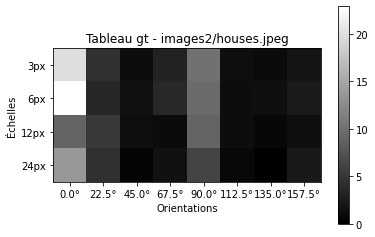

array([[19.90915298,  4.41794109,  1.19534266,  3.0932374 , 10.11225319,
         1.29784465,  0.9887684 ,  1.86687148],
       [22.89768219,  3.55789661,  1.43790495,  3.68657947,  9.65737724,
         1.23470855,  1.38903224,  2.39570832],
       [ 9.02939224,  5.0205164 ,  1.25362527,  1.04042482,  9.01343727,
         1.17161071,  0.66454196,  1.38017058],
       [13.60402489,  4.41248322,  0.51864624,  1.53340578,  6.11657286,
         0.74275929,  0.16571075,  2.26921225]])

In [50]:
orientations = 8
scales = [3, 6, 12, 24]
image_path = 'images2/houses.jpeg'
tri_similartite(orientations, scales, image_path)

### 6. Calcul des transformées avec réhaussement pour les quatre image test et calcul de similarités par distance euclidienne. ###

Puis, pour chaque image, tri des autres par similarité.
Résultat attendu après réhaussement pour les quatre images :

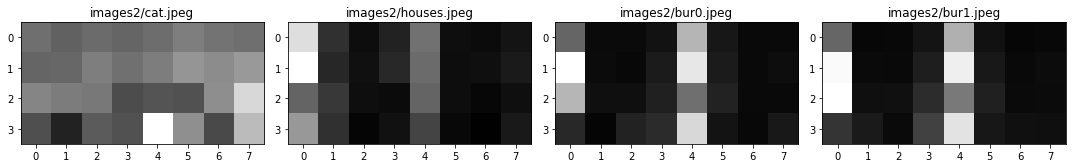

In [55]:
def tri_similartite(orientations, scales, image_paths):
    fig, axes = plt.subplots(nrows=1, ncols=len(image_paths), figsize=(15, 5))
    for i, image_path in enumerate(image_paths):
        img = mpimg.imread(image_path)
        gt = compute_energy(img, orientations, scales)
        axes[i].imshow(gt, cmap='gray', vmin=0, vmax=np.amax(gt))
        axes[i].set_title(image_path)

    plt.tight_layout()
    plt.show()

orientations = 8
scales = [3, 6, 12, 24]
image_files = ['images2/cat.jpeg', 'images2/houses.jpeg', 'images2/bur0.jpeg', 'images2/bur1.jpeg']
tri_similartite(orientations, scales, image_files)

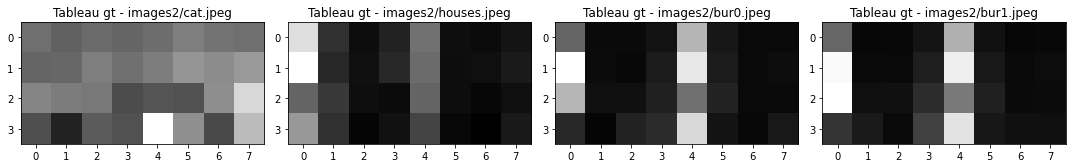

Sorted images by similarity to the target image:
images2/bur0.jpeg: 0.0
images2/bur1.jpeg: 6.785126114287104
images2/houses.jpeg: 22.852664546839364
images2/cat.jpeg: 27.8043535973189


In [62]:
# 计算两个矩阵gt1和gt2的欧氏距离（Euclidean distance）
def compute_similarity(gt1, gt2):
    return np.linalg.norm(gt1 - gt2)

def tri_similartite(orientations, scales, target_image_path, image_paths):
    target_img = mpimg.imread(target_image_path)
    target_gt = compute_energy(target_img, orientations, scales)

    fig, axes = plt.subplots(nrows=1, ncols=len(image_paths), figsize=(15, 5))
    similarities = []

    for i, image_path in enumerate(image_paths):
        img = mpimg.imread(image_path)
        gt = compute_energy(img, orientations, scales)

        # Display Gabor filter energy matrix for each image
        axes[i].imshow(gt, cmap='gray', vmin=0, vmax=np.amax(gt))
        axes[i].set_title('Tableau gt - ' + image_path)

        # Compute similarity and store in the list
        similarity = compute_similarity(target_gt, gt)
        similarities.append((image_path, similarity))

    plt.tight_layout()
    plt.show()

    # Sort images by similarity
    sorted_images = sorted(similarities, key=lambda x: x[1])

    print("Sorted images by similarity to the target image:")
    for image_path, similarity in sorted_images:
        print(f"{image_path}: {similarity}")

# Set parameters
orientations = 8
scales = [3, 6, 12, 24]
image_files = ['images2/cat.jpeg', 'images2/houses.jpeg', 'images2/bur0.jpeg', 'images2/bur1.jpeg']
target_image_path = 'images2/bur0.jpeg'

tri_similartite(orientations, scales, target_image_path, image_files)

### 7. Accélérer le calcul. ###

 # Ajout du redimensionnement de l'image
- img_pillow = Image.fromarray(img)
- img_pillow = img_pillow.resize((img.shape[0] // 2, img.shape[1] // 2), resample=Image.BILINEAR)
- img_resized = np.array(img_pillow)

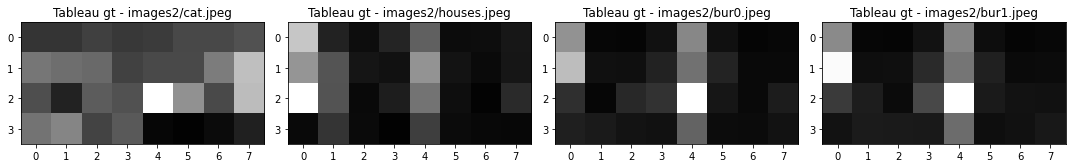

Sorted images by similarity to the target image:
images2/bur0.jpeg: 22.863377896095
images2/houses.jpeg: 25.752017524194223
images2/cat.jpeg: 27.770894893014823
images2/bur1.jpeg: 28.650450487725422


In [64]:
# 计算两个矩阵gt1和gt2的欧氏距离（Euclidean distance）
def compute_similarity(gt1, gt2):
    return np.linalg.norm(gt1 - gt2)

def tri_similartite(orientations, scales, target_image_path, image_paths):
    target_img = mpimg.imread(target_image_path)
    target_gt = compute_energy(target_img, orientations, scales)

    fig, axes = plt.subplots(nrows=1, ncols=len(image_paths), figsize=(15, 5))
    similarities = []

    for i, image_path in enumerate(image_paths):
        img = mpimg.imread(image_path)

         # Ajout du redimensionnement de l'image
        img_pillow = Image.fromarray(img)
        img_pillow = img_pillow.resize((img.shape[0] // 2, img.shape[1] // 2), resample=Image.BILINEAR)
        
        gt = compute_energy(img_pillow, orientations, scales)

        # Display Gabor filter energy matrix for each image
        axes[i].imshow(gt, cmap='gray', vmin=0, vmax=np.amax(gt))
        axes[i].set_title('Tableau gt - ' + image_path)

        # Compute similarity and store in the list
        similarity = compute_similarity(target_gt, gt)
        similarities.append((image_path, similarity))

    plt.tight_layout()
    plt.show()

    # Sort images by similarity
    sorted_images = sorted(similarities, key=lambda x: x[1])

    print("Sorted images by similarity to the target image:")
    for image_path, similarity in sorted_images:
        print(f"{image_path}: {similarity}")

# Set parameters
orientations = 8
scales = [3, 6, 12, 24]
image_files = ['images2/cat.jpeg', 'images2/houses.jpeg', 'images2/bur0.jpeg', 'images2/bur1.jpeg']
target_image_path = 'images2/bur0.jpeg'

tri_similartite(orientations, scales, target_image_path, image_files)

### 9. Implémentation manuelle d'un opérateur de pooling. ###

- Plutôt qu'utiliser la fonction resize() de PILLOW, vous pouvez, à titre d'entraînement, implémenter un opérateur de “average pooling” 2×2 pour effectuer la réduction de taille de l'image.



In [4]:
def average_pooling(image):
    img = mpimg.imread(image)
    img_array = np.array(img)
    
    # Normaliser les valeurs des pixels entre 0 et 1
    img_array = img_array // 65536
    
    # Créer une nouvelle image pour stocker le résultat du pooling
    pooled_image = np.zeros((2, 2, 3))

    # Parcourir l'image avec un pas de 2x2
    for i in range(0, 2):
        for j in range(0, 2):
            # Prendre la moyenne des pixels dans chaque sous-région 2x2
            pooled_image[i, j] = np.mean(img_array[i, j])
    
    return pooled_image

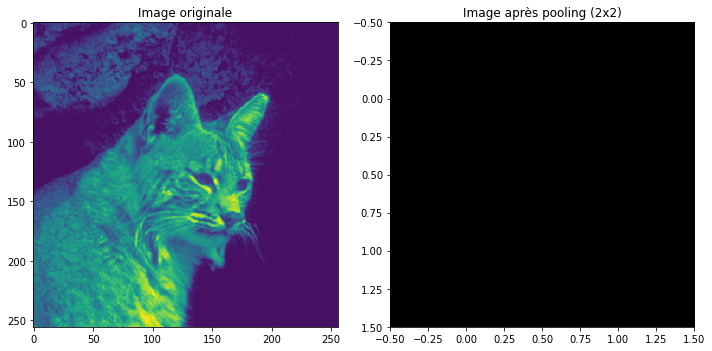

In [5]:
original_image = 'images2/cat.jpeg'
pooled_image = average_pooling(original_image)

# Affichage de l'image originale et de l'image après pooling
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(mpimg.imread(original_image))
axes[0].set_title('Image originale')

axes[1].imshow(pooled_image)
axes[1].set_title('Image après pooling (2x2)')

plt.tight_layout()
plt.show()